In [2]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '../functions/')
from statistics_functions import *
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import cartopy.crs as ccrs
import cartopy

In [3]:
base_path  = '/work/bk1377/a270230/'
path_ds    = base_path + 'lkf_datasets/daily_data/'
path_out   = base_path + 'data_transfer/'

# Calculate LKF frequency

In [4]:
years = [2013, 2016, 2020, 2093, 2096, 2099]

In [6]:
datasets = []
for year in years:
    datasets.append(np.load(path_ds + f'ds_{year}.npy', allow_pickle=True)[0])

In [7]:
lkf_data = datasets[0]
mask = np.where(np.isnan(lkf_data.calc_eps(0)[1]), np.nan, 1)

coarse_grid_box_size_km = 25

In [10]:
res_km = get_res_km(datasets)

In [14]:
%%time
d = 151

LKFs_f = []
for lkf_data in datasets:
    
    LKFs_f_tmp = np.zeros_like(mask)
    for i in range(d):
        LKFs_f_tmp += coarse_graining(lkf_data.finetuning(i=i, dog_thres=0.05, plot=False), coarse_grid_box_size_km, res_km)

    LKFs_f_tmp *= mask

    LKFs_f.append(LKFs_f_tmp / d)

CPU times: user 4min 23s, sys: 30.7 s, total: 4min 53s
Wall time: 6min 20s


In [15]:
np.save(path_out + 'LKFs_f', LKFs_f)

In [16]:
LKFs_f = np.load(path_out + 'LKFs_f.npy')

In [17]:
i = 3

LKFs_f_av = np.mean(LKFs_f[:i], axis=0)
LKFs_f_sd = np.sqrt(np.var(LKFs_f[:i], axis=0))

LKFs_f_90_av = np.mean(LKFs_f[i:], axis=0)
LKFs_f_90_sd = np.sqrt(np.var(LKFs_f[i:], axis=0))

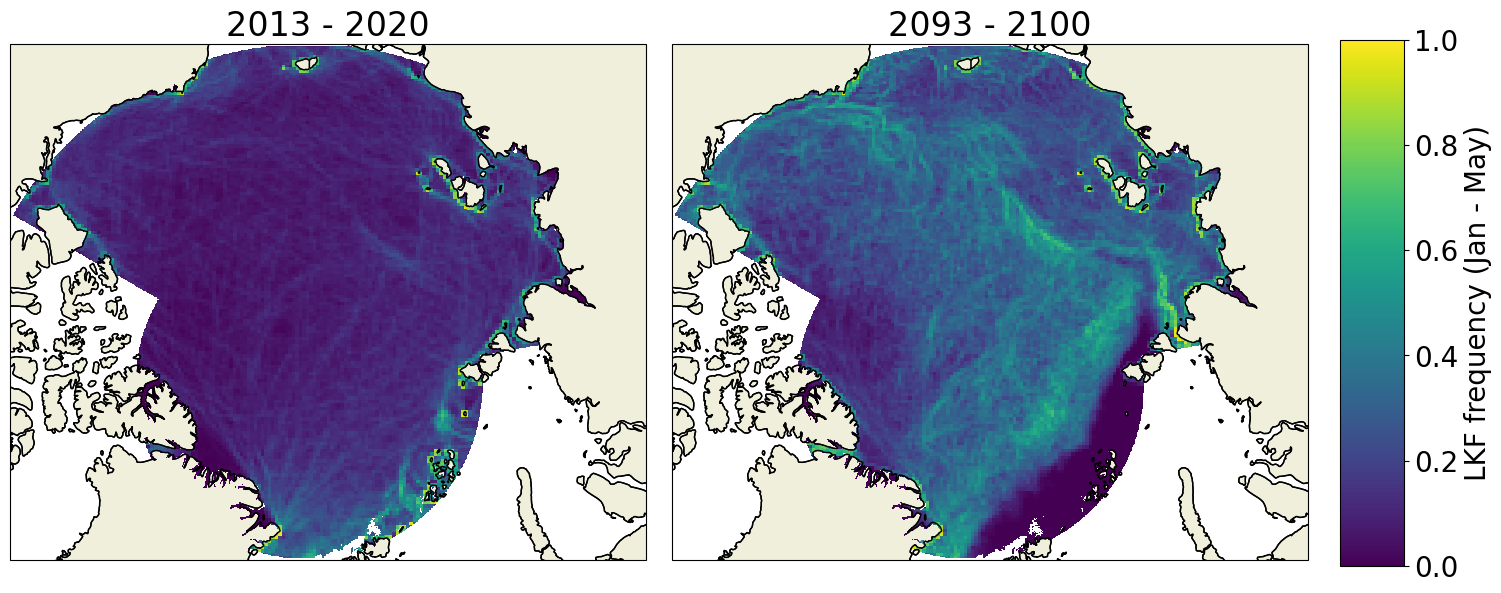

In [18]:
fig = plt.figure(figsize=[16, 8])
plt.rcParams.update({'font.size':20})

for col, data, title in zip([1,2], [LKFs_f_av, LKFs_f_90_av], ['2013 - 2020', '2093 - 2100']):

    ax = plt.subplot(1, 2, col, projection=ccrs.Orthographic(0, 90))

    ax.coastlines(zorder=3)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

    it = lkf_data.indexes[0]

    pcm = ax.pcolormesh(lkf_data.lon[max([0,lkf_data.index_y[0][0]-1]):lkf_data.index_y[0][-1]+2:lkf_data.red_fac,
                           max([0,lkf_data.index_x[0][0]-1]):lkf_data.index_x[0][-1]+2:lkf_data.red_fac],
                  lkf_data.lat[max([0,lkf_data.index_y[0][0]-1]):lkf_data.index_y[0][-1]+2:lkf_data.red_fac,
                           max([0,lkf_data.index_x[0][0]-1]):lkf_data.index_x[0][-1]+2:lkf_data.red_fac],
                  data,transform=ccrs.PlateCarree(),vmin=0,vmax=1)
    ax.set_title(title)
    
fig.tight_layout()
fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.17, 0.04, 0.658])
cbar = fig.colorbar(pcm, cax=cbar_ax)
cbar.set_label('LKF frequency (Jan - May)')

#plt.savefig(imgs_path + 'comp_f_lfks.png', dpi=200, bbox_inches='tight')

In [19]:
rel_diff = (LKFs_f[2] - LKFs_f[0]) / LKFs_f[0]
rel_diff_90 = (LKFs_f[5] - LKFs_f[3]) / LKFs_f[3]

/tmp/ipykernel_1102615/2714090029.py:1: RuntimeWarning: divide by zero encountered in divide
  rel_diff = (LKFs_f[2] - LKFs_f[0]) / LKFs_f[0]
/tmp/ipykernel_1102615/2714090029.py:1: RuntimeWarning: invalid value encountered in divide
  rel_diff = (LKFs_f[2] - LKFs_f[0]) / LKFs_f[0]
/tmp/ipykernel_1102615/2714090029.py:2: RuntimeWarning: divide by zero encountered in divide
  rel_diff_90 = (LKFs_f[5] - LKFs_f[3]) / LKFs_f[3]
/tmp/ipykernel_1102615/2714090029.py:2: RuntimeWarning: invalid value encountered in divide
  rel_diff_90 = (LKFs_f[5] - LKFs_f[3]) / LKFs_f[3]


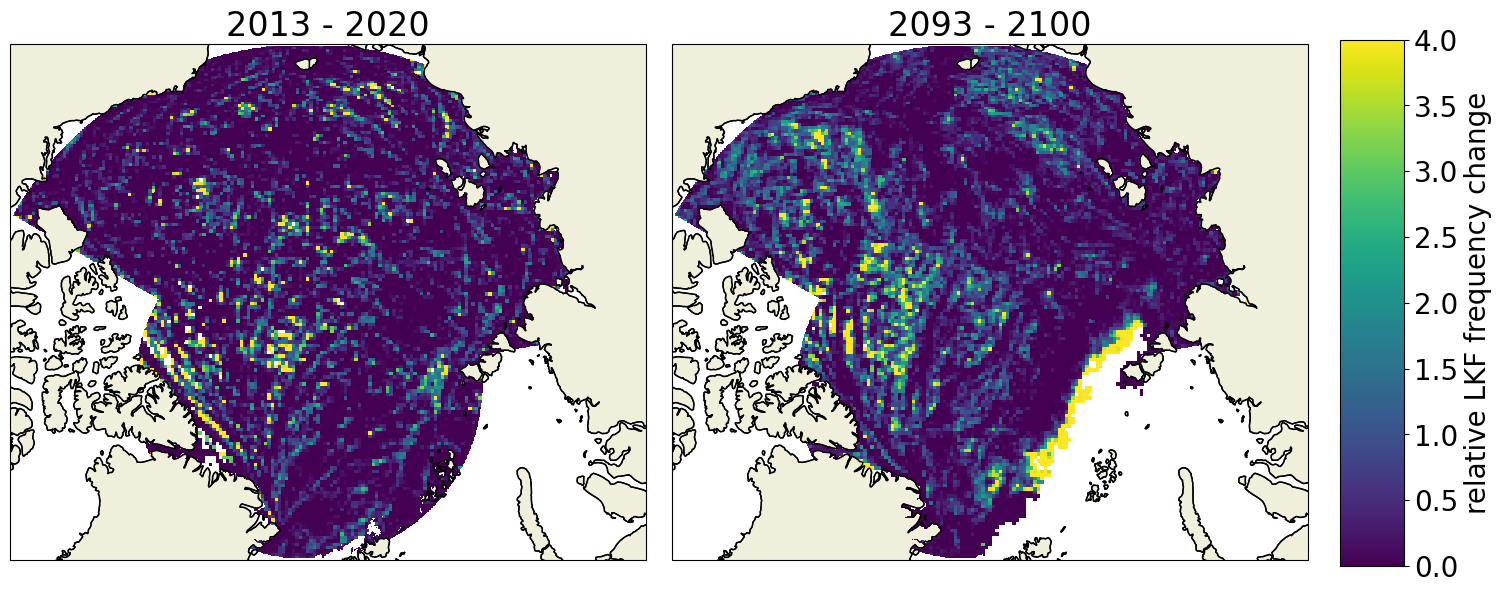

In [20]:
fig = plt.figure(figsize=[16, 8])

for col, data, title in zip([1,2], [rel_diff, rel_diff_90], ['2013 - 2020', '2093 - 2100']):

    ax = plt.subplot(1, 2, col, projection=ccrs.Orthographic(0, 90))

    ax.coastlines(zorder=3)
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

    it = lkf_data.indexes[0]

    pcm = ax.pcolormesh(lkf_data.lon[max([0,lkf_data.index_y[0][0]-1]):lkf_data.index_y[0][-1]+2:lkf_data.red_fac,
                           max([0,lkf_data.index_x[0][0]-1]):lkf_data.index_x[0][-1]+2:lkf_data.red_fac],
                  lkf_data.lat[max([0,lkf_data.index_y[0][0]-1]):lkf_data.index_y[0][-1]+2:lkf_data.red_fac,
                           max([0,lkf_data.index_x[0][0]-1]):lkf_data.index_x[0][-1]+2:lkf_data.red_fac],
                  data,transform=ccrs.PlateCarree(),vmin=0,vmax=4)
    ax.set_title(title)
    
fig.tight_layout()
fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.17, 0.04, 0.658])
cbar = fig.colorbar(pcm, cax=cbar_ax)
cbar.set_label('relative LKF frequency change')

#plt.savefig(imgs_path + 'comp_f_lfks.png', dpi=200, bbox_inches='tight')

# 